<a href="https://colab.research.google.com/github/victoria2012/test_deeplearning/blob/master/NaverShopping_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

분류기 melcab을 사용해보자!

In [1]:
!python -m pip install konlpy

     |████████████████████████████████| 19.4 MB 1.6 MB/s 
     |████████████████████████████████| 86 kB 4.7 MB/s 
     |████████████████████████████████| 448 kB 50.5 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [2]:
!curl -O https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh   # 오픈api 등이 동작하는 것을 확인하고 싶을 때 많이 사용

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5064  100  5064    0     0  88842      0 --:--:-- --:--:-- --:--:-- 88842


In [3]:
!bash ./mecab.sh                 # sh(쉘) 리눅스에서만 사용하는 파일확장자.

Installing automake (A dependency for mecab-ko)
Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:10 http://security.ubuntu.com/ubuntu bionic-security/main amd64 Packages [2,263 kB]
Get:11 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelea

In [4]:
!curl -O https://raw.githubusercontent.com/bab2min/corpus/master/sentiment/naver_shopping.txt


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 19.6M  100 19.6M    0     0  47.9M      0 --:--:-- --:--:-- --:--:-- 47.8M


In [5]:
import pandas as pd

In [6]:
total_data = pd.read_table('./naver_shopping.txt', names=['ratings', 'reviews'])
total_data.head(10)

,ratings,reviews
0,5,배공빠르고 굿
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ
5,2,비추합니다 계란 뒤집을 때 완전 불편해요 ㅠㅠ 코팅도 묻어나고 보기엔 예쁘고 실용적...
6,1,주문을 11월6에 시켰는데 11월16일에 배송이 왔네요 ㅎㅎㅎ 여기 회사측과는 전화...
7,2,넉넉한 길이로 주문했는데도 안 맞네요 별로예요
8,2,보폴이 계속 때처럼 나오다가 지금은 안나네요~
9,2,110인데 전문속옷브랜드 위생팬티105보다 작은듯해요. 불편해요. 밴딩부분이 다 신...


In [7]:
total_data.info()    # info 정보를 보니 결측치 작업을 하지 않아도 된다. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   ratings  200000 non-null  int64 
 1   reviews  200000 non-null  object
dtypes: int64(1), object(1)
memory usage: 3.1+ MB


In [8]:
# 중복된 값을 자동적으로 제거해주는 툴을 이용해보자 : drop_duplicate

In [9]:
len(total_data.drop_duplicates(subset=['reviews']))

199908

In [10]:
total_data.drop_duplicates(subset=['reviews'], inplace=True)
len(total_data)

199908

In [11]:
total_data.isnull()

,ratings,reviews
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
199995,False,False
199996,False,False
199997,False,False
199998,False,False


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_data = total_data['reviews']
y_data = total_data['ratings']

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((149931,), (149931,), (49977,), (49977,))

In [15]:
# 분포 확인 --> 데이터가 한쪽으로 쏠려있다는 것을 알 수 있다. 3을 임의로 채워넣거나 부족한 데이터를 늘려서 평준화시켜주는 것이 좋다. --> 클러스터링, 스모트(smote)를 쓴다. 
y_data.value_counts()

5    81170
2    63948
1    36007
4    18783
Name: ratings, dtype: int64

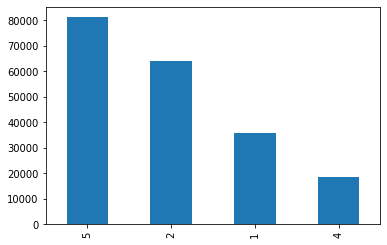

In [16]:
y_data.value_counts().plot(kind='bar')

# NLP 처리

   1) 토큰화

In [17]:
# 레귤러 익스프레션을 쓰면 부호 등을 제거하고 글자만 가지고 올 수 있다. 

In [48]:
x_train.str.replace('[^가-힣ㄱ-ㅎㅠ]',' ')   # [a-zA-Z]

149508                  재구매 위시본 사료 좋은건 익히들어 알죠 기호성은 잘 모르겠어요
31971     단단해서 좋긴 한데   토마토맛이랑 향이 잘 안나요 빨갛긴한데 몇 일 더 후숙시켜서...
138863    정말 엉망이네요 리뷰에서 별로다 별로다 하길래 얼마나 별로길ㄹ  했는데 정말 별로네...
187812     칫솔이 뜯어져서왔네요 칫솔모 리필이 상자에서 뒹굴고있어서 깜짝놀랐네요 급해서 쓰긴씁니다
101460    드림캐쳐랑 부엉이 만드려고 이것저것 주문했어용 서비스도 주셔서 앞으로도 여기서만 주...
                                ...                        
188616                쓰다보니 고리에서 집게가 빠지네요 한두개만 그런게 아니라 여러개가요
10859                                   개 주문했는데  개 밖에 안왔네요 
147869                                 별로    잘 안 올라가서 손이 안감
53441                             혼합을 주문했는데      유리구슬만 왔네요 
90135     재구매 항상 검색해서 구매했었는데 여기 정착해도 될것 같에요  포장 꼼꼼하고 배송 ...
Name: reviews, Length: 149931, dtype: object

In [49]:
type(x_train), x_train

(pandas.core.series.Series,
 149508                  재구매 위시본 사료 좋은건 익히들어 알죠 기호성은 잘 모르겠어요
 31971     단단해서 좋긴 한데.. 토마토맛이랑 향이 잘 안나요 빨갛긴한데 몇 일 더 후숙시켜서...
 138863    정말 엉망이네요 리뷰에서 별로다 별로다 하길래 얼마나 별로길ㄹㅐ 했는데 정말 별로네...
 187812     칫솔이 뜯어져서왔네요;칫솔모 리필이 상자에서 뒹굴고있어서 깜짝놀랐네요 급해서 쓰긴씁니다
 101460    드림캐쳐랑 부엉이 만드려고 이것저것 주문했어용 서비스도 주셔서 앞으로도 여기서만 주...
                                 ...                        
 188616                쓰다보니 고리에서 집게가 빠지네요 한두개만 그런게 아니라 여러개가요
 10859                                 10개 주문했는데 9개 밖에 안왔네요.
 147869                                 별로... 잘 안 올라가서 손이 안감
 53441                             혼합을 주문했는데 100% 유리구슬만 왔네요.
 90135     재구매 항상 검색해서 구매했었는데 여기 정착해도 될것 같에요~ 포장 꼼꼼하고 배송 ...
 Name: reviews, Length: 149931, dtype: object)

In [51]:
from konlpy.tag import Mecab

In [52]:
mecab = Mecab()     # mecab 초기화
print(mecab.morphs('와 이런 것도 상품이라고 차라리 내가 만드는게 나을 것 같다.'))    # 토큰화 + 원형 찾기

['와', '이런', '것', '도', '상품', '이', '라고', '차라리', '내', '가', '만드', '는', '게', '나을', '것', '같', '다', '.']


In [53]:
x_train_small = x_train[0:5000]

In [54]:
sentence = list()
stopwords = ['도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게']

for tok in x_train_small:
  # print(mecab.morphs(tok))
  encoded = mecab.morphs(tok)
  sentence.append([item for item in encoded if item not in stopwords])
  
print(sentence)

[['재', '구매', '위시본', '사료', '좋', '건', '익히', '어', '알', '죠', '기호', '성', '잘', '모르', '겠', '어요'], ['단단', '해서', '좋', '긴', '한데', '.', '.', '토마토', '맛', '이랑', '향', '잘', '안', '나', '요', '빨갛', '긴', '한데', '몇', '일', '더', '후숙', '시켜서', '먹', '어', '볼게요'], ['정말', '엉망', '네요', '리뷰', '에서', '별로', '별로', '길래', '얼마나', '별로', '길', 'ㄹ', 'ㅐ', '했', '는데', '정말', '별로', '네요', '19000', '원', '아까운', '적', '참', '처음', '네요', '옷', '장사', '시', '분', '마감', '질', '확인', '제대로', '안', '시', '나', '봐', '여', 'ㅎ', '앞', '으로', '흥하', '세요', '~', 'ㅋ', '19000', '원', '짜리', '하리보', '잘', '먹', '었', '습니다', '!', '!'], ['칫솔', '뜯', '어', '져서', '왔', '네요', ';', '칫솔', '모', '리필', '상자', '에서', '뒹굴', '있', '어서', '깜짝', '놀랐', '네요', '급', '해서', '쓰', '긴', '씁니다'], ['드림', '캐', '쳐', '랑', '부엉이', '만드', '려고', '이것저것', '주문', '했', '어용', '서비스', '주', '셔서', '앞', '으로', '여기', '서', '만', '주문', '려', '구용', 'ㅎ'], ['비추', '예요', '제품', '별로', '예요', '.', '..', '너무', '얇', '제', '질', '별로', '구요', '.', '.', '여행', '갈', '때', '급하', '막', '쓸까', '합니다', '.', '아무렇', '게나', '.', '굴려도', '될', '제품', '네요', '전', '비추'

# Tokenizer
### 숫자화 (자연어 전처리 과정)

In [55]:
import tensorflow as tf

In [56]:
tokenizer = tf.keras.preprocessing.text.Tokenizer()

In [57]:
tokenizer.fit_on_texts(sentence)

In [58]:
tokenizer.word_index

{'.': 1,
 '네요': 2,
 '좋': 3,
 '어요': 4,
 '는데': 5,
 '아요': 6,
 '잘': 7,
 '있': 8,
 '구매': 9,
 '안': 10,
 '습니다': 11,
 '했': 12,
 '배송': 13,
 '너무': 14,
 '같': 15,
 '거': 16,
 '어': 17,
 '먹': 18,
 '!': 19,
 '되': 20,
 '재': 21,
 '~': 22,
 '합니다': 23,
 '않': 24,
 '기': 25,
 '요': 26,
 '쓰': 27,
 '로': 28,
 '없': 29,
 '..': 30,
 '것': 31,
 '사용': 32,
 '겠': 33,
 '해서': 34,
 '아': 35,
 '었': 36,
 ',': 37,
 '나': 38,
 '으로': 39,
 '았': 40,
 '보다': 41,
 '지만': 42,
 '어서': 43,
 '주': 44,
 '가격': 45,
 '그냥': 46,
 '해': 47,
 '서': 48,
 '아서': 49,
 '면': 50,
 '생각': 51,
 '보': 52,
 '만': 53,
 '좀': 54,
 '제품': 55,
 '입니다': 56,
 '라': 57,
 '해요': 58,
 '주문': 59,
 '만족': 60,
 '니': 61,
 '맛': 62,
 '받': 63,
 '더': 64,
 '할': 65,
 '많이': 66,
 '샀': 67,
 '왔': 68,
 '때': 69,
 '번': 70,
 '개': 71,
 '사': 72,
 '별로': 73,
 '에서': 74,
 '시': 75,
 '빠르': 76,
 '작': 77,
 '사이즈': 78,
 '두': 79,
 '?': 80,
 '음': 81,
 '던': 82,
 '맛있': 83,
 'ㅠㅠ': 84,
 '수': 85,
 '저렴': 86,
 '포장': 87,
 '^^': 88,
 '넘': 89,
 'ㅠ': 90,
 '상품': 91,
 '다른': 92,
 '맞': 93,
 '입': 94,
 '용': 95,
 '일': 96,
 '하나': 9

In [59]:
tokenizer.word_counts                 # word_counts를 통해 해당 단어가 몇번 들어갔는지 알 수 있다. 

OrderedDict([('재', 439),
             ('구매', 838),
             ('위시본', 1),
             ('사료', 6),
             ('좋', 1592),
             ('건', 90),
             ('익히', 2),
             ('어', 492),
             ('알', 97),
             ('죠', 63),
             ('기호', 3),
             ('성', 30),
             ('잘', 892),
             ('모르', 114),
             ('겠', 345),
             ('어요', 1127),
             ('단단', 5),
             ('해서', 343),
             ('긴', 119),
             ('한데', 63),
             ('.', 3845),
             ('토마토', 2),
             ('맛', 233),
             ('이랑', 65),
             ('향', 68),
             ('안', 789),
             ('나', 334),
             ('요', 403),
             ('빨갛', 3),
             ('몇', 47),
             ('일', 144),
             ('더', 228),
             ('후숙', 1),
             ('시켜서', 6),
             ('먹', 485),
             ('볼게요', 4),
             ('정말', 139),
             ('엉망', 18),
             ('네요', 1705),
             ('리뷰', 35),
  

In [60]:
total_cnt = len(tokenizer.word_index)

In [61]:
rare_cnt = 0
total_freq, rare_freq = 0, 0
for key, value in tokenizer.word_counts.items():    # 딕셔너리기 때문에 .items()로 뽑아낼 수 있다. items()를 쓰면 키(key) : 값(value)을 쌍으로 뽑아낼 수 있다. 
  total_freq = total_freq + value   # 전체 단어의 수
  if(value <= 2):
    rare_cnt = rare_cnt + 1
    rare_freq = rare_freq + value # 2 미만인 단어의 수

In [62]:
total_cnt, rare_cnt, (rare_cnt/total_cnt)*100, (rare_freq/total_freq)*100

(8086, 5320, 65.7927281721494, 7.8448327628655505)

In [63]:
vocab_size = total_cnt - rare_cnt           # 사전의 size

In [64]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(vocab_size, oov_token='OOV')
tokenizer.fit_on_texts(sentence)

In [65]:
tokenizer.index_word

{1: 'OOV',
 2: '.',
 3: '네요',
 4: '좋',
 5: '어요',
 6: '는데',
 7: '아요',
 8: '잘',
 9: '있',
 10: '구매',
 11: '안',
 12: '습니다',
 13: '했',
 14: '배송',
 15: '너무',
 16: '같',
 17: '거',
 18: '어',
 19: '먹',
 20: '!',
 21: '되',
 22: '재',
 23: '~',
 24: '합니다',
 25: '않',
 26: '기',
 27: '요',
 28: '쓰',
 29: '로',
 30: '없',
 31: '..',
 32: '것',
 33: '사용',
 34: '겠',
 35: '해서',
 36: '아',
 37: '었',
 38: ',',
 39: '나',
 40: '으로',
 41: '았',
 42: '보다',
 43: '지만',
 44: '어서',
 45: '주',
 46: '가격',
 47: '그냥',
 48: '해',
 49: '서',
 50: '아서',
 51: '면',
 52: '생각',
 53: '보',
 54: '만',
 55: '좀',
 56: '제품',
 57: '입니다',
 58: '라',
 59: '해요',
 60: '주문',
 61: '만족',
 62: '니',
 63: '맛',
 64: '받',
 65: '더',
 66: '할',
 67: '많이',
 68: '샀',
 69: '왔',
 70: '때',
 71: '번',
 72: '개',
 73: '사',
 74: '별로',
 75: '에서',
 76: '시',
 77: '빠르',
 78: '작',
 79: '사이즈',
 80: '두',
 81: '?',
 82: '음',
 83: '던',
 84: '맛있',
 85: 'ㅠㅠ',
 86: '수',
 87: '저렴',
 88: '포장',
 89: '^^',
 90: '넘',
 91: 'ㅠ',
 92: '상품',
 93: '다른',
 94: '맞',
 95: '입',
 96: '용',
 97: '

In [66]:
x_train_small = tokenizer.texts_to_sequences(sentence)

In [67]:
len(x_train_small[0]), len(x_train_small[50]), len(x_train_small[200]), len(x_train_small[500])

(16, 38, 7, 22)

In [68]:
# 평균적인 size를 구해야 함

In [69]:
hist_len = [len(words) for words in x_train_small]  

(array([ 21.,  57., 429., 350., 674., 312., 260., 413., 158., 295., 133.,
        263.,  86., 100., 189.,  78., 164.,  90.,  69., 115.,  48.,  86.,
         44.,  82.,  38.,  37.,  76.,  35.,  54.,  28.,  44.,  17.,  18.,
         41.,  11.,  19.,  12.,   9.,  15.,   5.,  11.,   2.,   4.,   0.,
          4.,   2.,   0.,   1.,   0.,   1.]),
 array([ 1.  ,  2.42,  3.84,  5.26,  6.68,  8.1 ,  9.52, 10.94, 12.36,
        13.78, 15.2 , 16.62, 18.04, 19.46, 20.88, 22.3 , 23.72, 25.14,
        26.56, 27.98, 29.4 , 30.82, 32.24, 33.66, 35.08, 36.5 , 37.92,
        39.34, 40.76, 42.18, 43.6 , 45.02, 46.44, 47.86, 49.28, 50.7 ,
        52.12, 53.54, 54.96, 56.38, 57.8 , 59.22, 60.64, 62.06, 63.48,
        64.9 , 66.32, 67.74, 69.16, 70.58, 72.  ]),
 <a list of 50 Patch objects>)

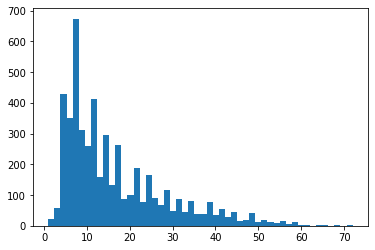

In [84]:
import matplotlib.pyplot as plt
plt.hist(hist_len, bins=50)

In [85]:
sum(hist_len) / len(x_train_small)    # 17 이면 데이터가 너무 많이 없어지므로 50 정도로 한다. 

16.653

In [86]:
x_train_small = tf.keras.preprocessing.sequence.pad_sequences(x_train_small, maxlen=50)

In [87]:
y_train_small = y_train[0:5000]

In [88]:
y_train_small= np.array(y_train_small)-1
np.unique(y_train_small)

array([0, 1, 3, 4])

In [89]:
import numpy as np

In [90]:
np.unique(y_train_small)

array([0, 1, 3, 4])

# Make model

In [91]:
model = tf.keras.models.Sequential()

In [92]:
model.add(tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=32, input_length=50)) # input layer     # output은 30~50 정도 넣어줄 것 
# model.add(tf.keras.layers.LSTM(128)) 
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128))) # hidden layer
model.add(tf.keras.layers.GRU(128))
model.add(tf.keras.layers.Dense(5, activation='softmax')) # output layer

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc']) # gadget

In [94]:
hist = model.fit(x_train_small, y_train_small, epochs=3, batch_size=256, validation_split=0.3, shuffle=True)

Epoch 1/3
14/14 [==============================] - 7s 538ms/step - loss: 1.1498 - acc: 0.5171 - val_loss: 1.0880 - val_acc: 0.5840
Epoch 2/3
14/14 [==============================] - 7s 527ms/step - loss: 1.0173 - acc: 0.6086 - val_loss: 0.9544 - val_acc: 0.6060
Epoch 3/3
14/14 [==============================] - 8s 557ms/step - loss: 0.9268 - acc: 0.6317 - val_loss: 0.9664 - val_acc: 0.6140
